# Ⅰ -- Math Assignment:
## Raw Forward Propagation

1. **Input to Hidden Layer Computation:**
   - For each neuron in the hidden layer, the input is the dot product of the $ x $ vector and the weights $ w $, since there is no bias term, so $ out = x \cdot w $.
   - Given that the initial weights are 0.1, we have three inputs $ x = [6, 2, 2] $.
   - Therefore, the $ out $ for each neuron in the hidden layer will be $ 6 \times 0.1 + 2 \times 0.1 + 2 \times 0.1 = 1.0 $.

2. **Activation in Hidden Layer:**
   - Apply the ReLU activation function, $ \text{ReLU}(out) = \max(0, out) $, since $ out $ is 1.0, the output after activation remains $1.0$.

3. **Hidden to Output Layer Computation:**
   - Similarly, the $ out $ for the output layer is also the dot product of the inputs, $ out = 1.0 \times 0.1 + 1.0 \times 0.1 = 0.2 $.

4. **Activation in Output Layer:**
   - Apply the ReLU activation function to the output layer, $ \text{ReLU}(out) = \max(0, 0.2) = 0.2 $.
   - So, the raw modeled output $ \hat{y} $ is $0.2$.

## Backpropagation

To compute the gradient and update the weights, we use the loss function $ L = y - \hat{y} $ and a learning rate of 0.05.

1. **Loss Computation:**
   - The given true value $ y = 0.7 $, the model output $ \hat{y} = 0.2 $.
   - The loss $ L = y - \hat{y} = 0.7 - 0.2 = 0.5 $.

2. **Gradient for Output Layer Weights:**
   - $ \frac{\partial L}{\partial w} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial w} $.
   - $ \frac{\partial L}{\partial \hat{y}} = -1 $ since the loss function is $ L = y - \hat{y} $.
   - $ \frac{\partial \hat{y}}{\partial w} $ is the derivative of the ReLU function times the output of the hidden layer. Since ReLU's derivative is a unit step function, for $ out = 0.2 $, it is $1$.
   - The output of the hidden layer is 1, so $ \frac{\partial \hat{y}}{\partial w} = 1 $.
   - Thus, the gradient for the output layer weights $ \frac{\partial L}{\partial w} = -1 \times 1 \times 1 = -1 .$

3. **Gradient Calculation for Hidden Layer Weights:**
   - The gradient for hidden layer weights (since only one hidden layer neuron outputs a positive value, hence its gradient is non-zero):
     $ \frac{\partial L}{\partial w_{\text{hidden}}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \text{out}_{\text{hidden}}} \cdot \frac{\partial \text{out}_{\text{hidden}}}{\partial w_{\text{hidden}}} $
   - As $ \text{out}_{\text{hidden}} $ is activated by ReLU, its derivative is 1 for $ \text{out} > 0 $, hence:
     $ \frac{\partial \hat{y}}{\partial \text{out}_{\text{hidden}}} = w_{\text{out}} = 0.1 $
   - $ \frac{\partial \text{out}_{\text{hidden}}}{\partial w_{\text{hidden}}} $ is the input $ x $, hence:
     $ \frac{\partial L}{\partial w_{\text{hidden}}} = -1 \times 0.1 \times x = -1 \times 0.1 \times [6, 2, 2] = [-0.6, -0.2, -0.2] $

4. **Update Weights:**
   - After computing gradients for all weights, update them simultaneously:
   - For the output layer weights $ w_{\text{out}} $:
     $ w_{\text{out}_{\text{new}}} = w_{\text{out}_{\text{old}}} - \alpha \times \frac{\partial L}{\partial w_{\text{out}}} = 0.1 - 0.05 \times -1 = 0.1 + 0.05 = 0.15 $
   - For the hidden layer weights $ w_{\text{hidden}} $, for each corresponding input $ x_i $:
     $ w_{\text{hidden}_{\text{new}_6}} = w_{\text{hidden}_{\text{old}_6}} - \alpha \times \frac{\partial L}{\partial w_{\text{hidden}_6}} = 0.1 - 0.05 \times -0.6 = 0.1 + 0.03 = 0.13 $
     $ w_{\text{hidden}_{\text{new}_2}}= w_{\text{hidden}_{\text{old}_2}} - \alpha \times \frac{\partial L}{\partial w_{\text{hidden}_2}} = 0.1 - 0.05 \times -0.2 = 0.1 + 0.01 = 0.11 $
## Updated Forward Propagation

1. **Input to Hidden Layer Computation:**
   - For each neuron in the hidden layer, the input is the dot product of the $ x $ vector and the updated weights $ w_{\text{new}} $, since there is no bias term, so $ out = x \cdot w_{\text{new}} $.
   - Given that the initial weights are 0.1, we have three inputs $ x = [6, 2, 2] $.
   - Therefore, the $ out $ for each neuron in the hidden layer will be $ 6 \times 0.13 + 2 \times 0.11 + 2 \times 0.11 = 1.22 $.

2. **Activation in Hidden Layer:**
   - Apply the ReLU activation function, $ \text{ReLU}(out) = \max(0, out) $, since $ out $ is 1.22, the output after activation remains $1.22$.

3. **Hidden to Output Layer Computation:**
   - Similarly, the $ out $ for the output layer is also the dot product of the inputs, $ out = 1.22 \times 0.15 + 1.22 \times 0.15 = 0.366 $.

4. **Activation in Output Layer:**
   - Apply the ReLU activation function to the output layer, $ \text{ReLU}(out) = \max(0, 0.366) = 0.366 $.
   - So, the updated modeled output $ \hat{y}_{\text{new}} $ is $0.366$.
## The Final Answer is [0.366]()


# Ⅱ -- Coding Assignment:
## a. Data Preprocessing
1. Please modify the categorial variables into dummy variables (e.g., season, weathersit, month, hour, weekday)
2. Normalize continuous variables using z-score (mean=0,sd=1).
3. Exclude the useless features in your training and modeling.
4. Separate the training and validation data. Use the last 21 days’ data for
validation. Note that the target column is “cnt”. The other two “causal” and
“registered” could be overlooked and should not be used as variables in your
code. 

In [1]:
import pandas as pd
import numpy as np
import os
import tqdm 
import logging
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
class DataPreProcess(object):
    SourceDataPath='bikeRidershipPredictionDataHour.csv'
    DataSaveFolder='DataPreProcessed'
    # Exclude UnCorrelated Features
    UnCorrelatedBar=0.1
    # Overlooked features
    OverlookedFeatures=['casual','registered']
    # The categorial variables
    CategoryVariables=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
    # The continuous variables
    ContinuousVariables=['temp','atemp','hum','windspeed']
    # The target variable
    TargetVariable='cnt'
    # Validation data length (last days)
    ValidationDays=21
    def DropOverlookedVariables(self):
        # Drop the useless features
        self.RawData.drop(self.OverlookedFeatures,axis=1,inplace=True)
    def FileSystemMaker(self):
        # Create the folder for saving the preprocessed data
        if not os.path.exists(self.DataSaveFolder):
            os.makedirs(self.DataSaveFolder)
        self.VisualFolder=os.path.join(self.DataSaveFolder,'VisualAnalysisResults')
        if not os.path.exists(self.VisualFolder):
            os.makedirs(self.VisualFolder)
        self.DummyFolder=os.path.join(self.DataSaveFolder,'Dummy')
        if not os.path.exists(self.DummyFolder):
            os.makedirs(self.DummyFolder)
        self.NormalizeFolder=os.path.join(self.DataSaveFolder,'Normalize')
        if not os.path.exists(self.NormalizeFolder):
            os.makedirs(self.NormalizeFolder)
        self.ProcessedDatasetFolder=os.path.join(self.DataSaveFolder,'ProcessedDataset')
        if not os.path.exists(self.ProcessedDatasetFolder):
            os.makedirs(self.ProcessedDatasetFolder)
    def VisualAnalysis(self):
        # Visual analysis of the data
        for i in tqdm.tqdm(self.CategoryVariables,desc='Category Var Visual Analysis'):
            plt.figure(figsize=(20, 12))
            sns.boxplot(x = i, y = self.TargetVariable, data = self.RawData)
            plt.title('Boxplot of '+i+' vs '+self.TargetVariable)
            plt.savefig(os.path.join(self.VisualFolder,i+'.png'))
            if self.IFShowVisualResult:
                plt.show()
        print('The boxplot of the categorial variables have been saved in the folder:',self.VisualFolder)
        for i in tqdm.tqdm(self.ContinuousVariables,desc='Continuous Var Visual Analysis'):
            plt.figure(figsize=(20, 12))
            sns.boxplot(self.RawData[i])
            plt.title('Boxplot of '+i)
            plt.savefig(os.path.join(self.VisualFolder,i+'.png'))
            if self.IFShowVisualResult:
                plt.show()
        print('The boxplot of the categorial variables have been saved in the folder:',self.VisualFolder)
        Varlist=self.ContinuousVariables+[self.TargetVariable]
        sns.pairplot(self.RawData[Varlist])
        plt.title('Pairplot of Continuous Variables Vs Target Variable')
        plt.savefig(os.path.join(self.VisualFolder,'Pairplot of Continuous Variables Vs Target Variable.png'))
        if self.IFShowVisualResult:
            plt.show()
        print('The pairplot of the continuous variables have been saved in the folder:',self.VisualFolder)
    def DummyVariables(self):
        # Create the dummy variables for the categorial variables
        for i in tqdm.tqdm(self.CategoryVariables,desc='Creating Dummy Variables'):
            DummyData=pd.get_dummies(self.RawData[i],drop_first=False, prefix=i)
            DummyResult=pd.concat([self.RawData,DummyData],axis=1)
            # Remove the original categorial variables
            Columns=self.RawData.columns.tolist()
            # Save the dummy variables and the key variable
            Columns.remove('instant')
            DummyResult.drop(Columns,axis=1,inplace=True)
            DummyResult.to_csv(os.path.join(self.DummyFolder,i+'.csv'),index=False)
    def NormalizeVariables(self,target_mean=0,target_sd=1):
        # Normalize the continuous variables
        for i in tqdm.tqdm(self.ContinuousVariables,desc='Normalizing Variables'):
            Mean=self.RawData[i].mean()
            SD=self.RawData[i].std()
            NormalizedData=(self.RawData[i]-Mean)/SD
            NormalizedData=NormalizedData*target_sd+target_mean
            NormalizedData=pd.concat([self.RawData['instant'],NormalizedData],axis=1)
            NormalizedData.to_csv(os.path.join(self.NormalizeFolder,i+'.csv'),index=False)
    def ExcludeUselessFeatures(self):
        # Exclude the useless features
        self.UselessFeatureList=[]
        for i in self.CategoryVariables:
            corr=self.RawData[[i,self.TargetVariable]].corr()[self.TargetVariable][i]
            print('The correlation between',i,'and',self.TargetVariable,'is:',corr)
            if abs(corr)<self.UnCorrelatedBar:
                self.UselessFeatureList.append(i)
        for i in self.ContinuousVariables:
            corr=self.RawData[[i,self.TargetVariable]].corr()[self.TargetVariable][i]
            print('The correlation between',i,'and',self.TargetVariable,'is:',corr)
            if abs(corr)<self.UnCorrelatedBar:
                self.UselessFeatureList.append(i)
        print('The bar for uncorrelated features is:',self.UnCorrelatedBar)        
        print('The features:',self.UselessFeatureList,'are uncorrelated with the target variable:',self.TargetVariable)
        self.RawData.drop(self.UselessFeatureList,axis=1,inplace=True)
        print('The uncorrelated features have been dropped.')
    def SeparateData(self):
        # Separate the training and validation data
        Date=pd.to_datetime(self.RawData['dteday'].unique()).strftime('%Y-%m-%d')
        Date=Date.sort_values(ascending=False)
        ValidationDate=[]
        print('Rawdata is form:',Date[0],'to',Date[-1],'totally',len(Date),'days.')
        for i in range(0,self.ValidationDays):
            ValidationDate.append(Date[i])
        self.ValidationData=self.RawData[self.RawData['dteday'].isin(ValidationDate)]
        self.ValidationData.drop('dteday',axis=1,inplace=True)
        print('The validation data is from:',ValidationDate[0],'to',ValidationDate[-1],'totally',len(ValidationDate),'days','with',len(self.ValidationData),'records.')
        TrainDate=Date[self.ValidationDays:]
        self.TrainData=self.RawData[self.RawData['dteday'].isin(TrainDate)]
        self.TrainData.drop('dteday',axis=1,inplace=True)
        print('The training data is from:',TrainDate[0],'to',TrainDate[-1],'totally',len(TrainDate),'days','with',len(self.TrainData),'records.')
    def CreatDataset(self):
        # Create the dataset
        self.SeparateData()
        NotCreate=False
        for i in self.CategoryVariables:
            if (i not in self.UselessFeatureList):
                if not os.path.exists(os.path.join(self.DummyFolder,i+'.csv')):
                    print('The dummy variable:',i+'.csv','does not exist.','Please set IfDummy=True.')
                    NotCreate=True
                    break
                DummyData=pd.read_csv(os.path.join(self.DummyFolder,i+'.csv'))
                self.ValidationData.drop(i,axis=1,inplace=True)
                self.ValidationData=pd.merge(self.ValidationData,DummyData,on='instant',how='left')
        for i in self.ContinuousVariables:
            if (i not in self.UselessFeatureList):
                if not os.path.exists(os.path.join(self.NormalizeFolder,i+'.csv')):
                    print('The normalized variable:',i+'.csv','does not exist.','Please set IfNormalize=True.')
                    NotCreate=True
                    break
                NormalizedData=pd.read_csv(os.path.join(self.NormalizeFolder,i+'.csv'))
                self.ValidationData.drop(i,axis=1,inplace=True)
                self.ValidationData=pd.merge(self.ValidationData,NormalizedData,on='instant',how='left')
        for i in self.CategoryVariables:
            if (i not in self.UselessFeatureList):
                if not os.path.exists(os.path.join(self.DummyFolder,i+'.csv')):
                    print('The dummy variable:',i+'.csv','does not exist.','Please set IfDummy=True.')
                    NotCreate=True
                    break
                DummyData=pd.read_csv(os.path.join(self.DummyFolder,i+'.csv'))
                self.TrainData.drop(i,axis=1,inplace=True)
                self.TrainData=pd.merge(self.TrainData,DummyData,on='instant',how='left')
        for i in self.ContinuousVariables:
            if (i not in self.UselessFeatureList):
                if not os.path.exists(os.path.join(self.NormalizeFolder,i+'.csv')):
                    print('The normalized variable:',i+'.csv','does not exist.','Please set IfNormalize=True.')
                    NotCreate=True
                    break
                NormalizedData=pd.read_csv(os.path.join(self.NormalizeFolder,i+'.csv'))
                self.TrainData.drop(i,axis=1,inplace=True)
                self.TrainData=pd.merge(self.TrainData,NormalizedData,on='instant',how='left')
        # Save the preprocessed data
        if NotCreate:
            print('The preprocessed data has not been saved.')
            return
        else:
            np.save(os.path.join(self.ProcessedDatasetFolder,'ValidationData.npy'),self.ValidationData)
            np.save(os.path.join(self.ProcessedDatasetFolder,'TrainData.npy'),self.TrainData)
            print('The preprocessed data has been saved in the folder:',self.ProcessedDatasetFolder)
            print('The preprocessed data has been saved as ValidationData.npy and TrainData.npy.')
    def __init__(self,IFVisualAnalysis=False,IFShowVisualResult=False,IfCheckInfo=False,IfDummy=True,IfNormalize=True):
        # Read the source data
        self.RawData=pd.read_csv(self.SourceDataPath)
        # Drop the overlooked features
        self.DropOverlookedVariables()
        print('The overlooked features:',self.OverlookedFeatures,' have been dropped.')
        # Check the basic information of the source data
        if IfCheckInfo:
            self.RawData.info()
        # Set the parameters for preprocessing
        self.IFVisualAnalysis=IFVisualAnalysis
        self.IFShowVisualResult=IFShowVisualResult
        self.IfDummy=IfDummy
        self.IfNormalize=IfNormalize
        # Create the folder for saving the preprocessed data
        self.FileSystemMaker()
        if self.IFVisualAnalysis:
            print('The visual analysis results have been saved in the folder:',self.VisualFolder)
            self.VisualAnalysis()
        if self.IfDummy:
            print('The values of the categorial variables are:',self.CategoryVariables)
            self.DummyVariables()
            print('The dummy variables have been created.')
            print('The dummy variables have been saved in the folder:',self.DummyFolder)
        if self.IfNormalize:
            print('The values of the continuous variables are:',self.ContinuousVariables)
            self.NormalizeVariables()
            print('The continuous variables have been normalized.')
            print('The normalized data has been saved in the folder:',self.NormalizeFolder)
        self.ExcludeUselessFeatures()

The overlooked features: ['casual', 'registered']  have been dropped.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB
The visual analysis results have been saved in the folder: Da

Category Var Visual Analysis:   0%|          | 0/8 [00:00<?, ?it/s]

Category Var Visual Analysis: 100%|██████████| 8/8 [00:01<00:00,  4.63it/s]


The boxplot of the categorial variables have been saved in the folder: DataPreProcessed/VisualAnalysisResults


Continuous Var Visual Analysis: 100%|██████████| 4/4 [00:00<00:00,  6.49it/s]


The boxplot of the categorial variables have been saved in the folder: DataPreProcessed/VisualAnalysisResults
The pairplot of the continuous variables have been saved in the folder: DataPreProcessed/VisualAnalysisResults
The values of the categorial variables are: ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


Creating Dummy Variables: 100%|██████████| 8/8 [00:00<00:00, 45.16it/s]


The dummy variables have been created.
The dummy variables have been saved in the folder: DataPreProcessed/Dummy
The values of the continuous variables are: ['temp', 'atemp', 'hum', 'windspeed']


Normalizing Variables: 100%|██████████| 4/4 [00:00<00:00, 50.69it/s]


The continuous variables have been normalized.
The normalized data has been saved in the folder: DataPreProcessed/Normalize
The correlation between season and cnt is: 0.17805573098267663
The correlation between yr and cnt is: 0.2504948988596485
The correlation between mnth and cnt is: 0.12063776021315144
The correlation between hr and cnt is: 0.39407149778294204
The correlation between holiday and cnt is: -0.030927303249110614
The correlation between weekday and cnt is: 0.02689985999083953
The correlation between workingday and cnt is: 0.030284367747910722
The correlation between weathersit and cnt is: -0.14242613813809568
The correlation between temp and cnt is: 0.4047722757786578
The correlation between atemp and cnt is: 0.4009293041266357
The correlation between hum and cnt is: -0.32291074082456017
The correlation between windspeed and cnt is: 0.09323378392612537
The bar for uncorrelated features is: 0.1
The features: ['holiday', 'weekday', 'workingday', 'windspeed'] are uncorrelate

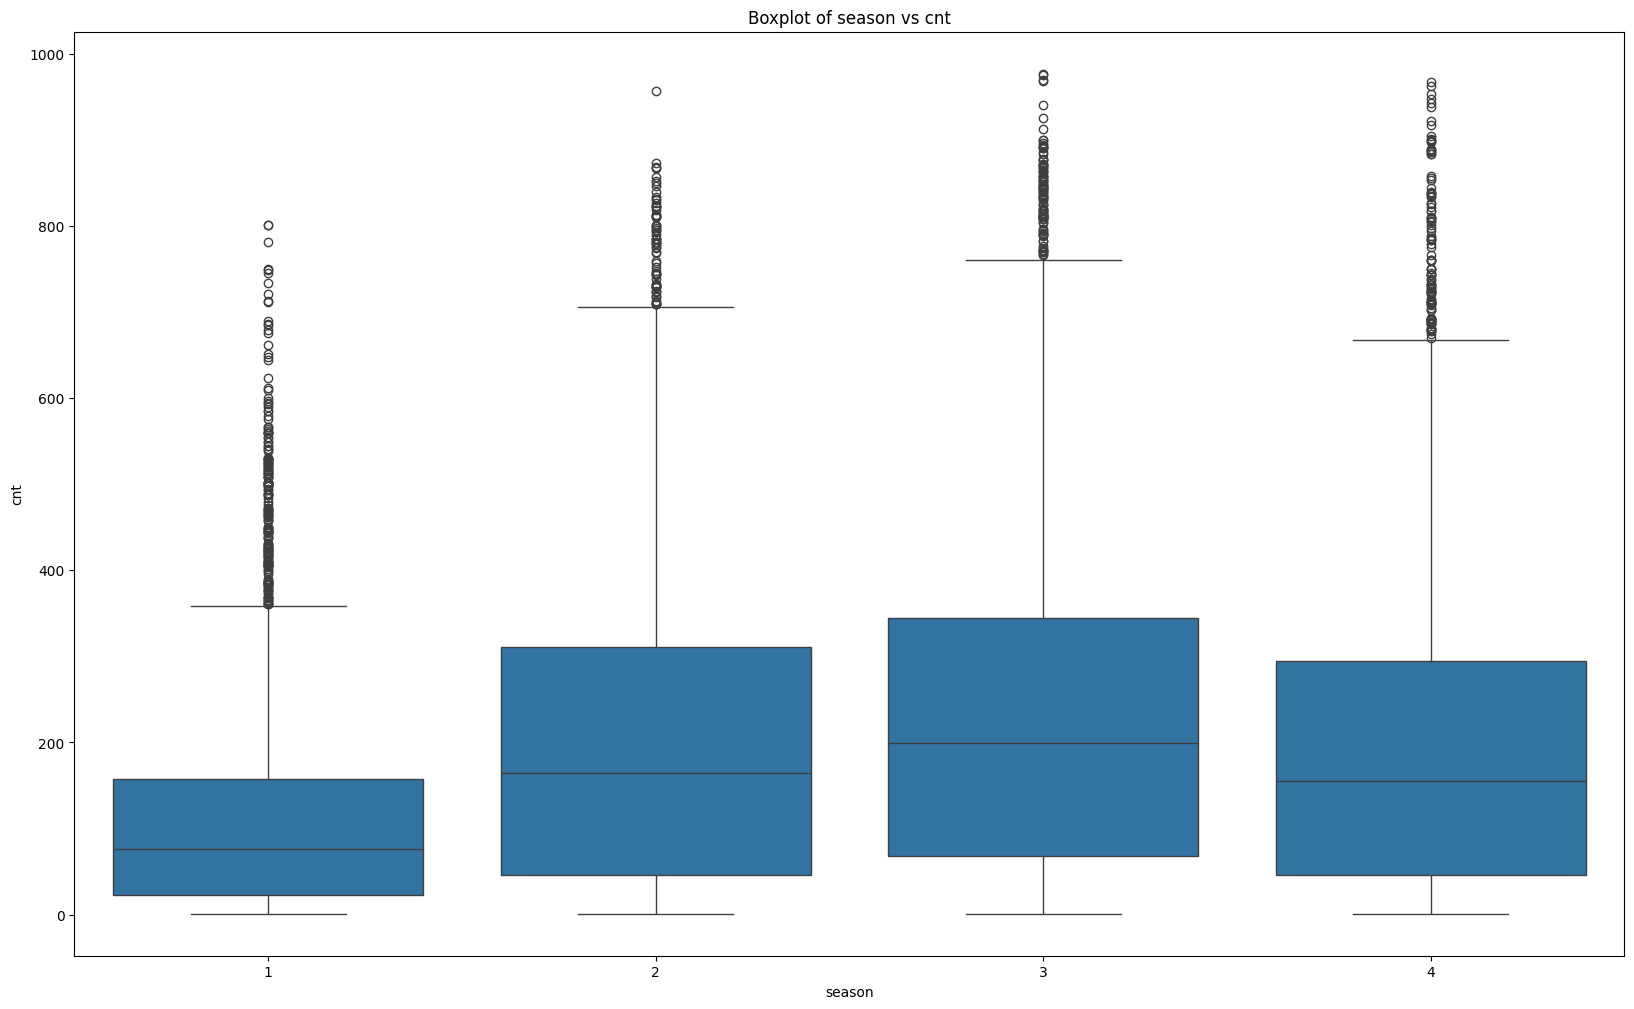

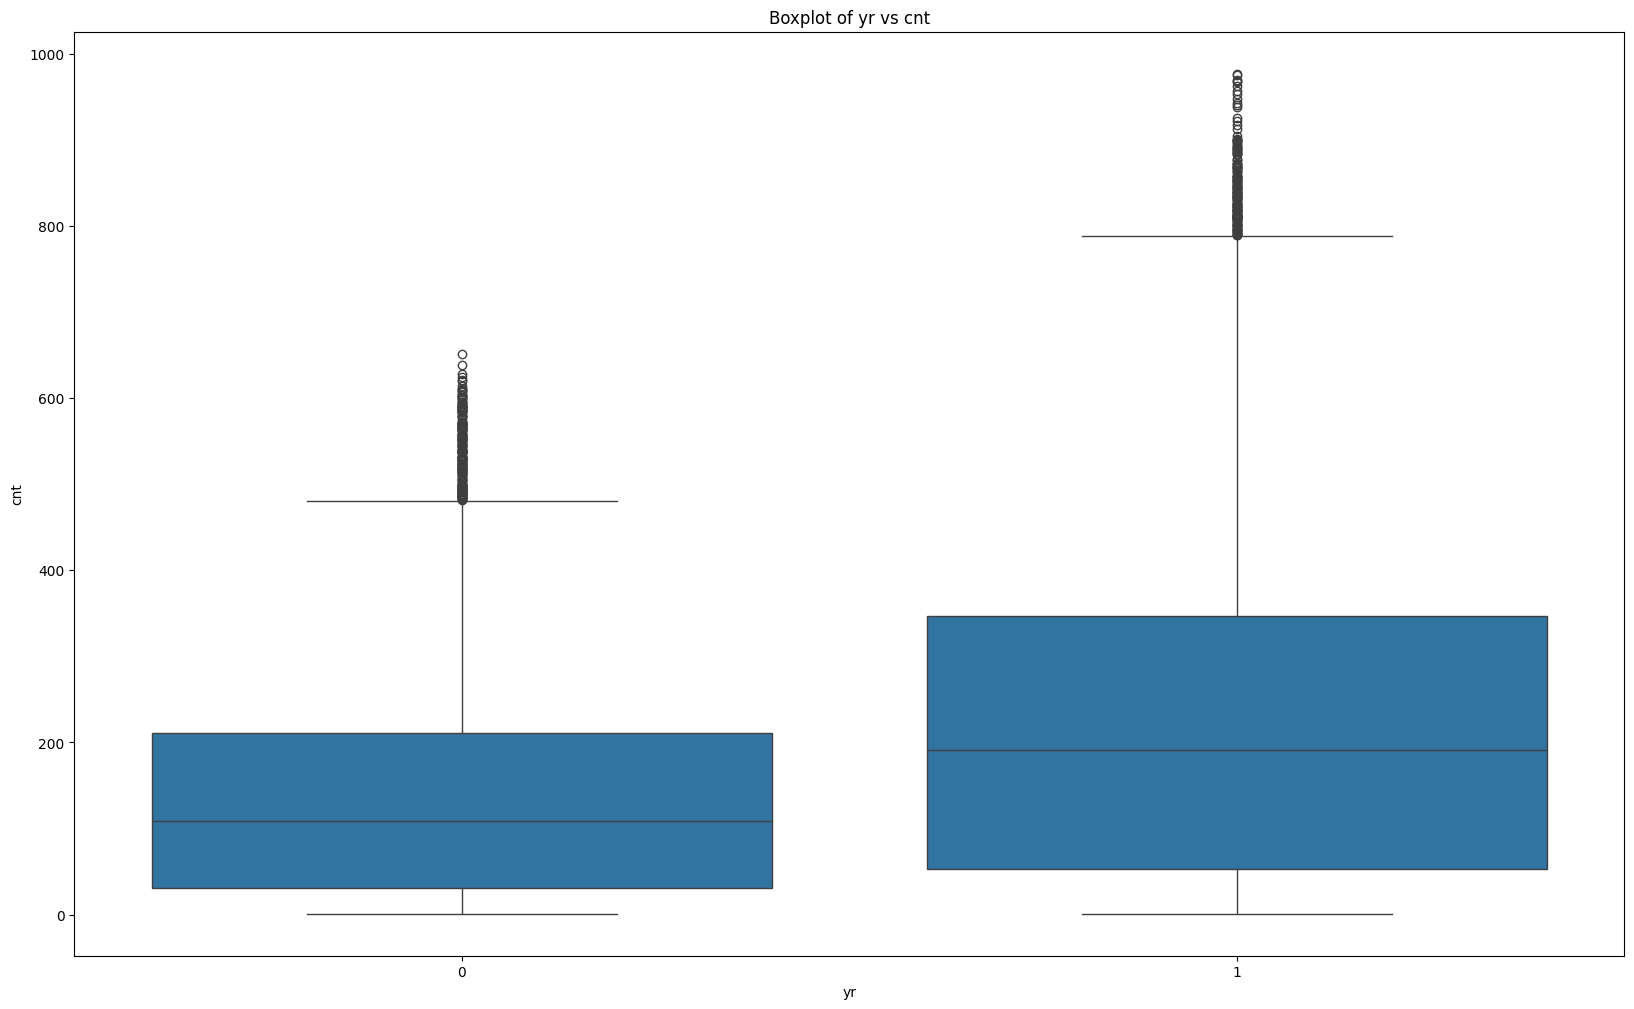

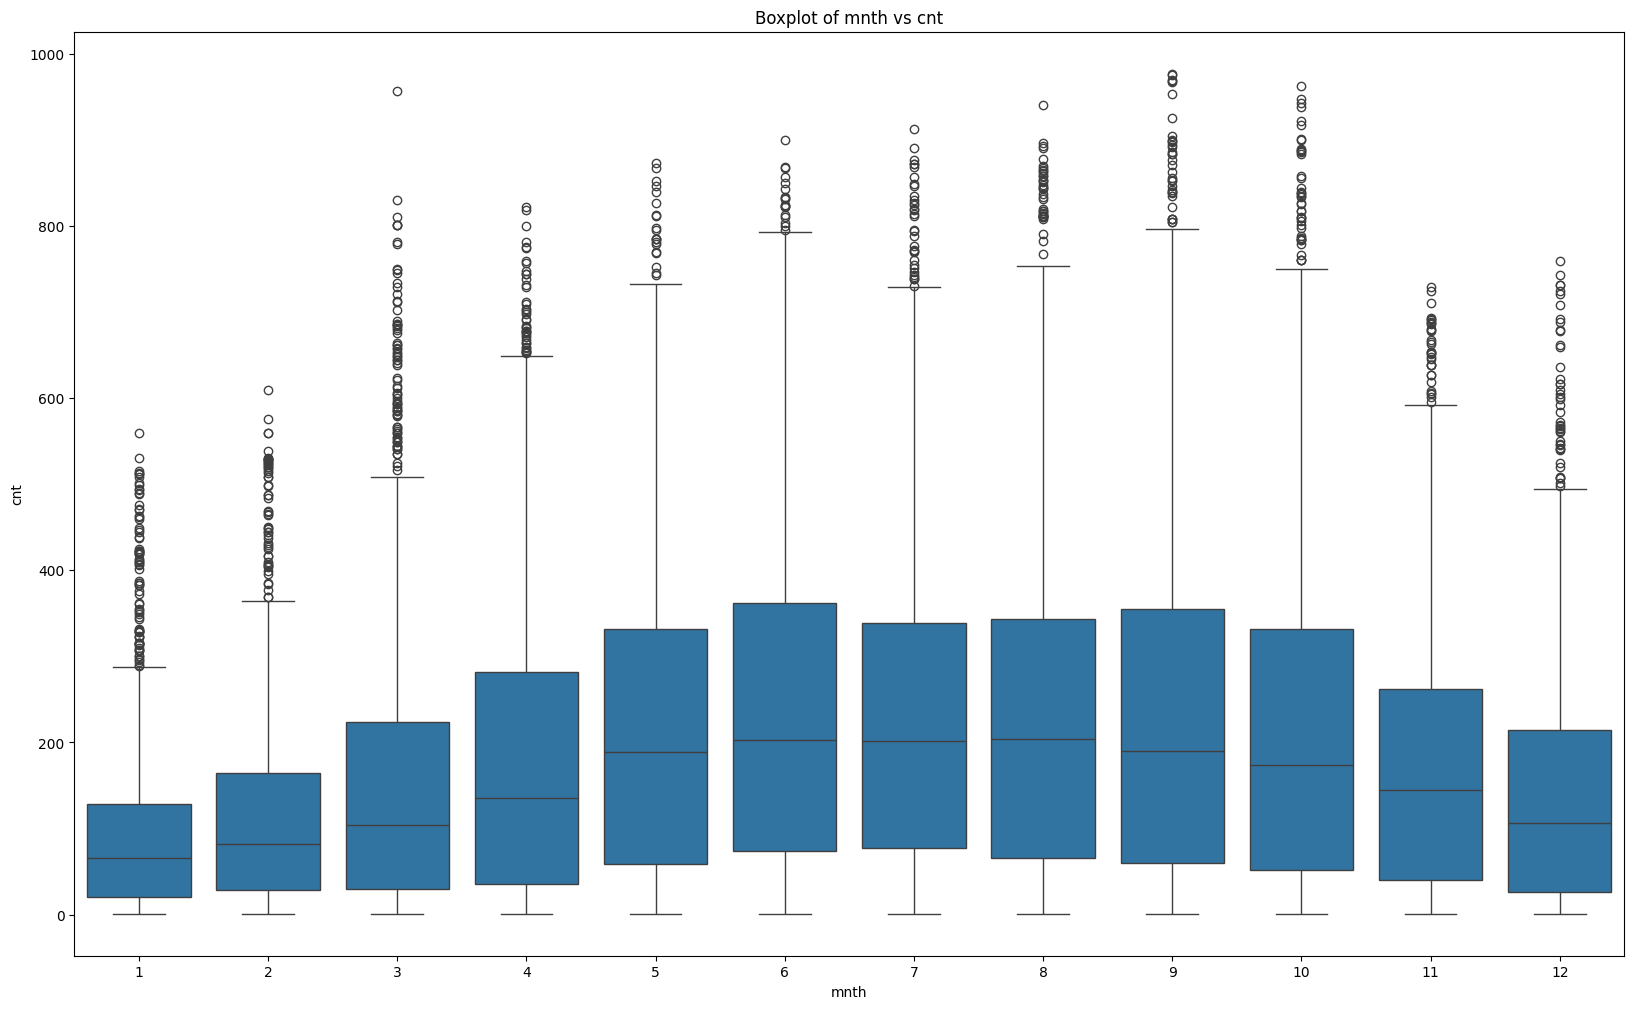

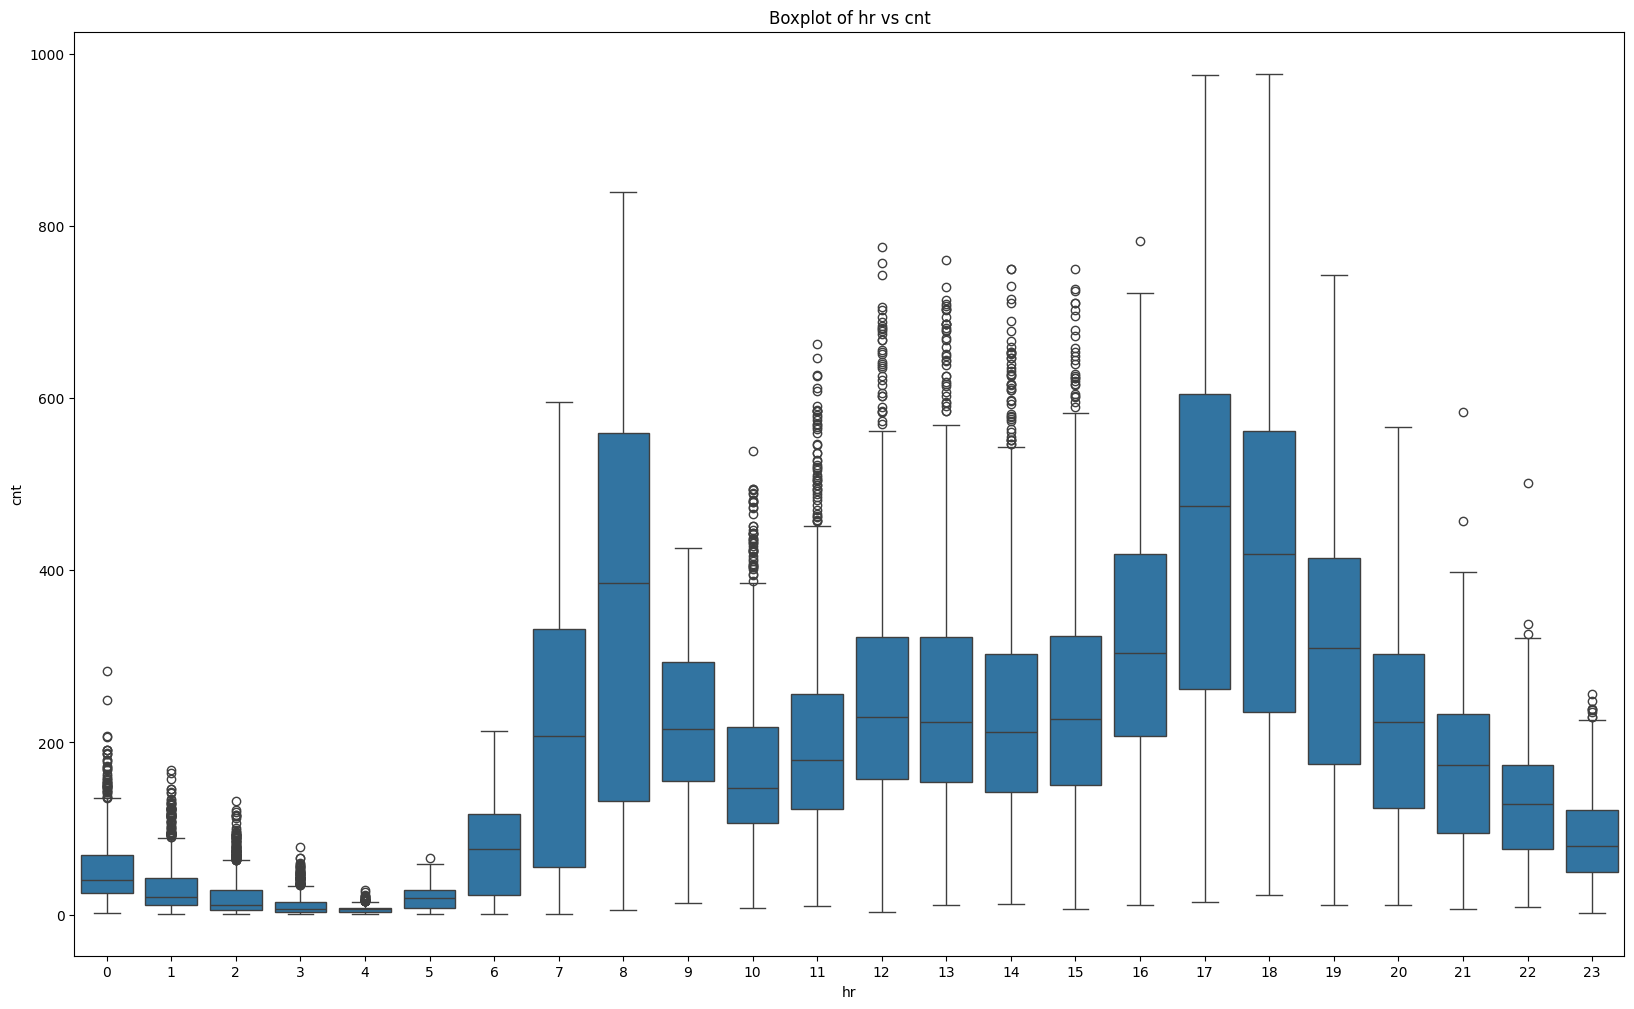

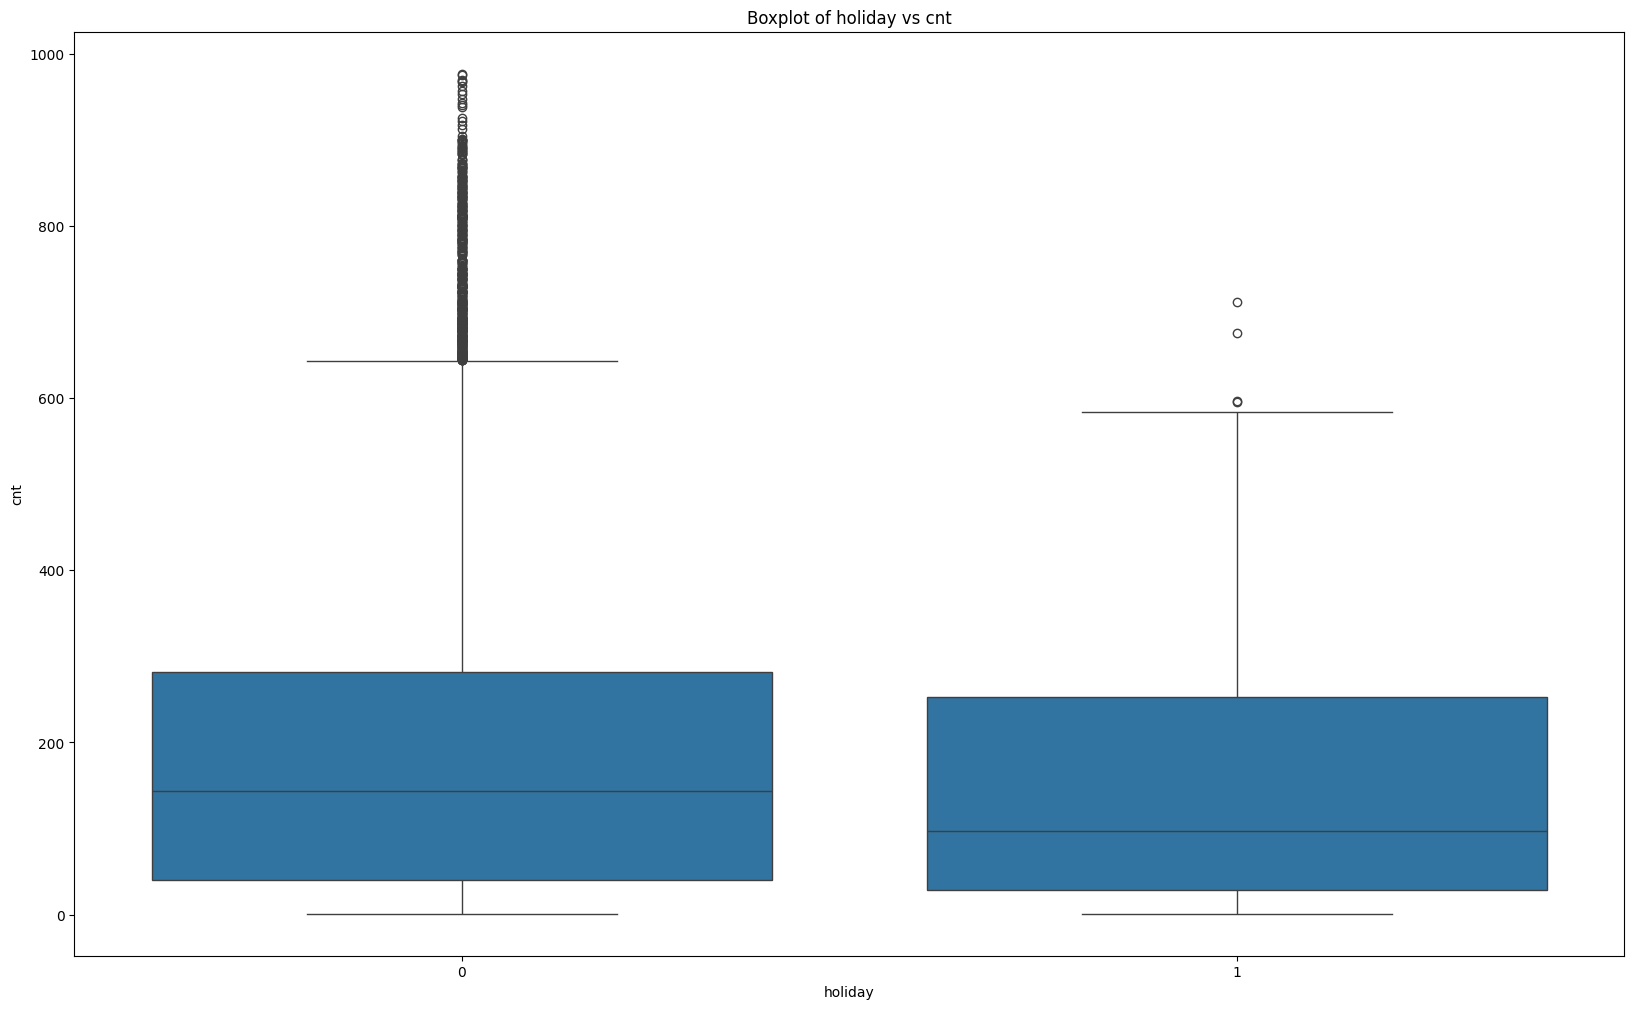

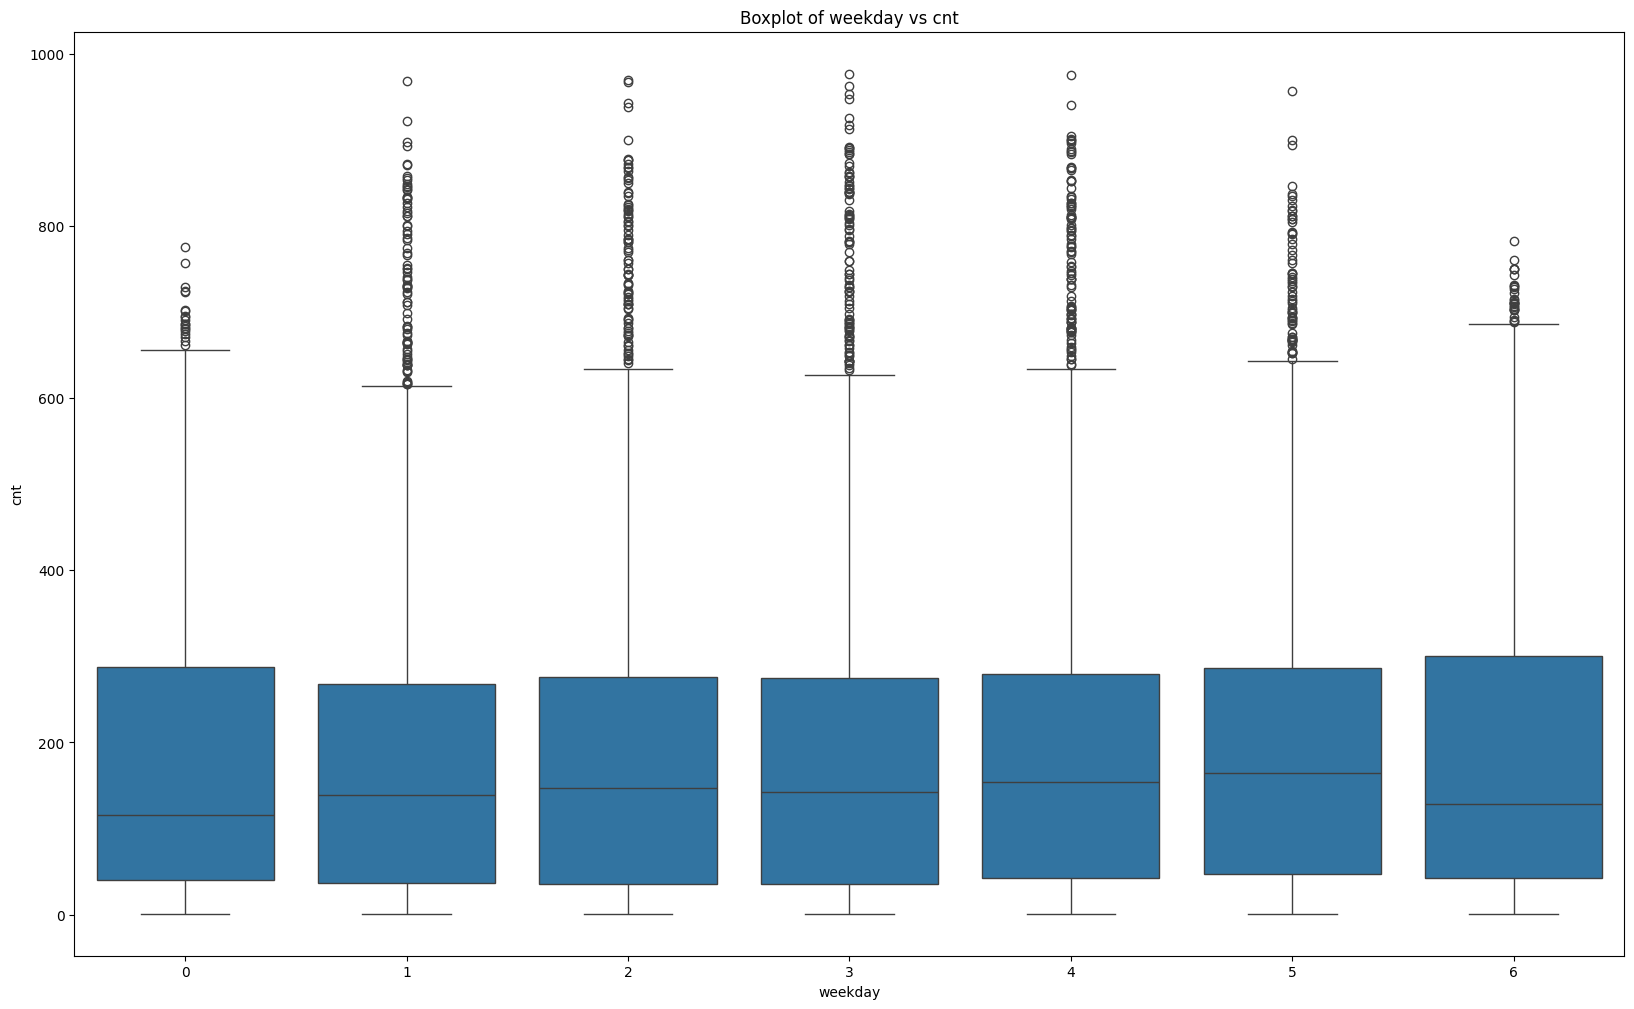

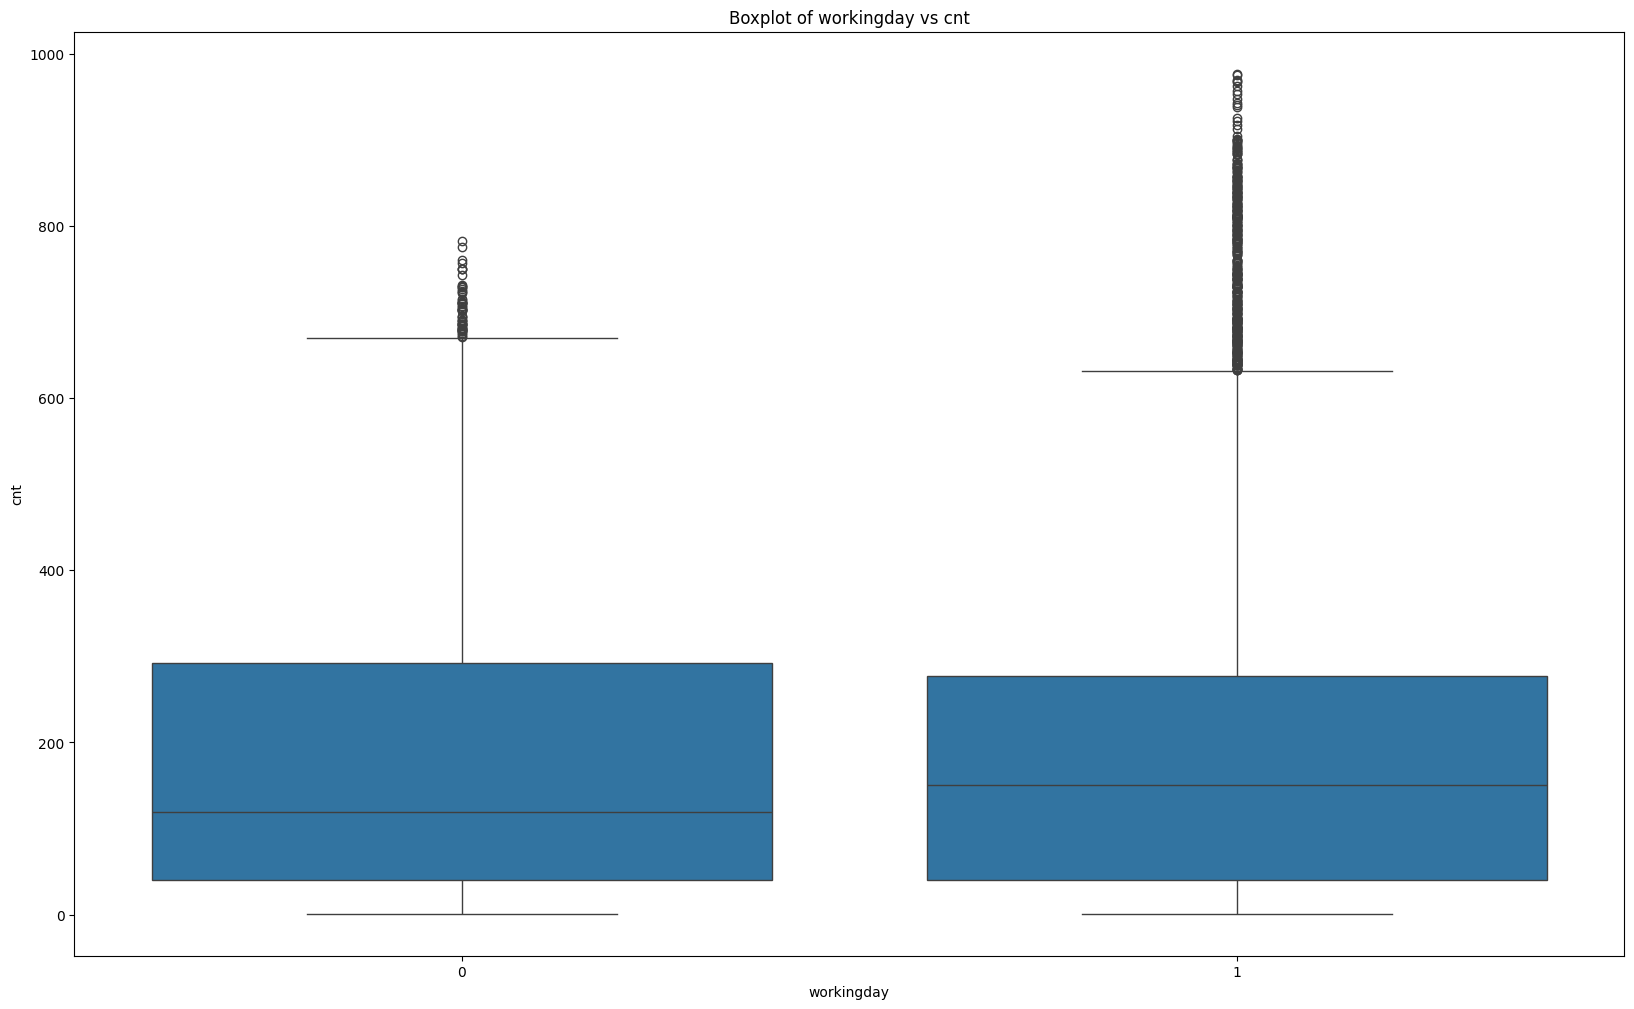

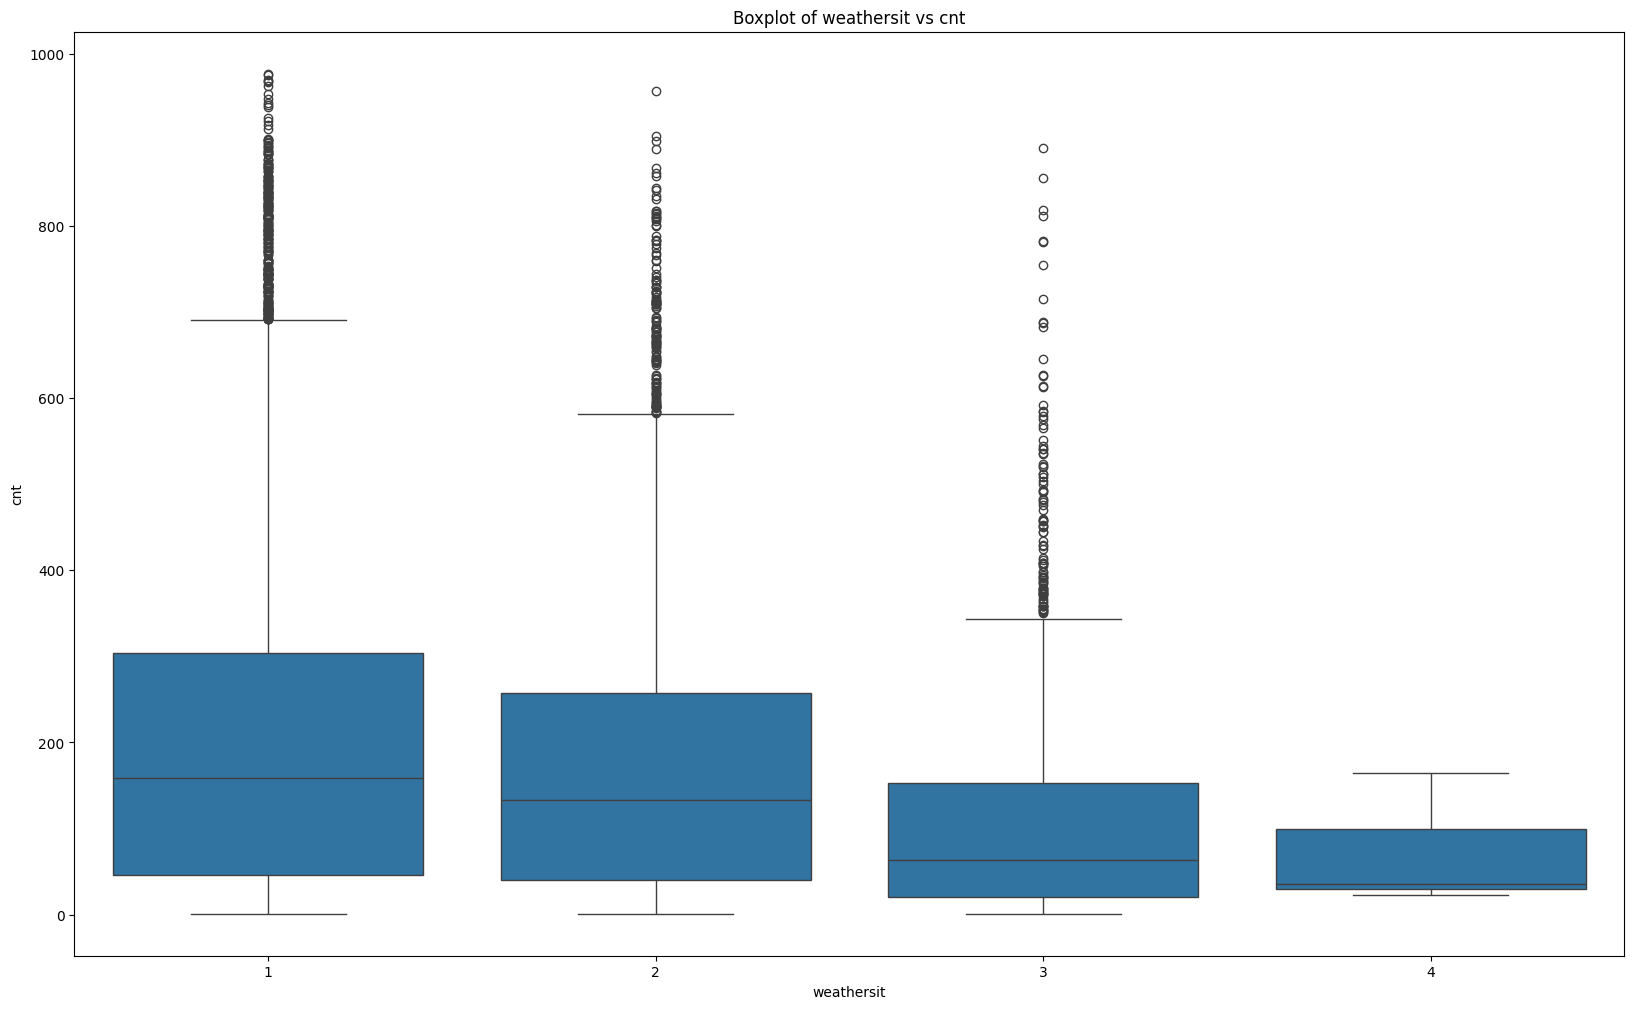

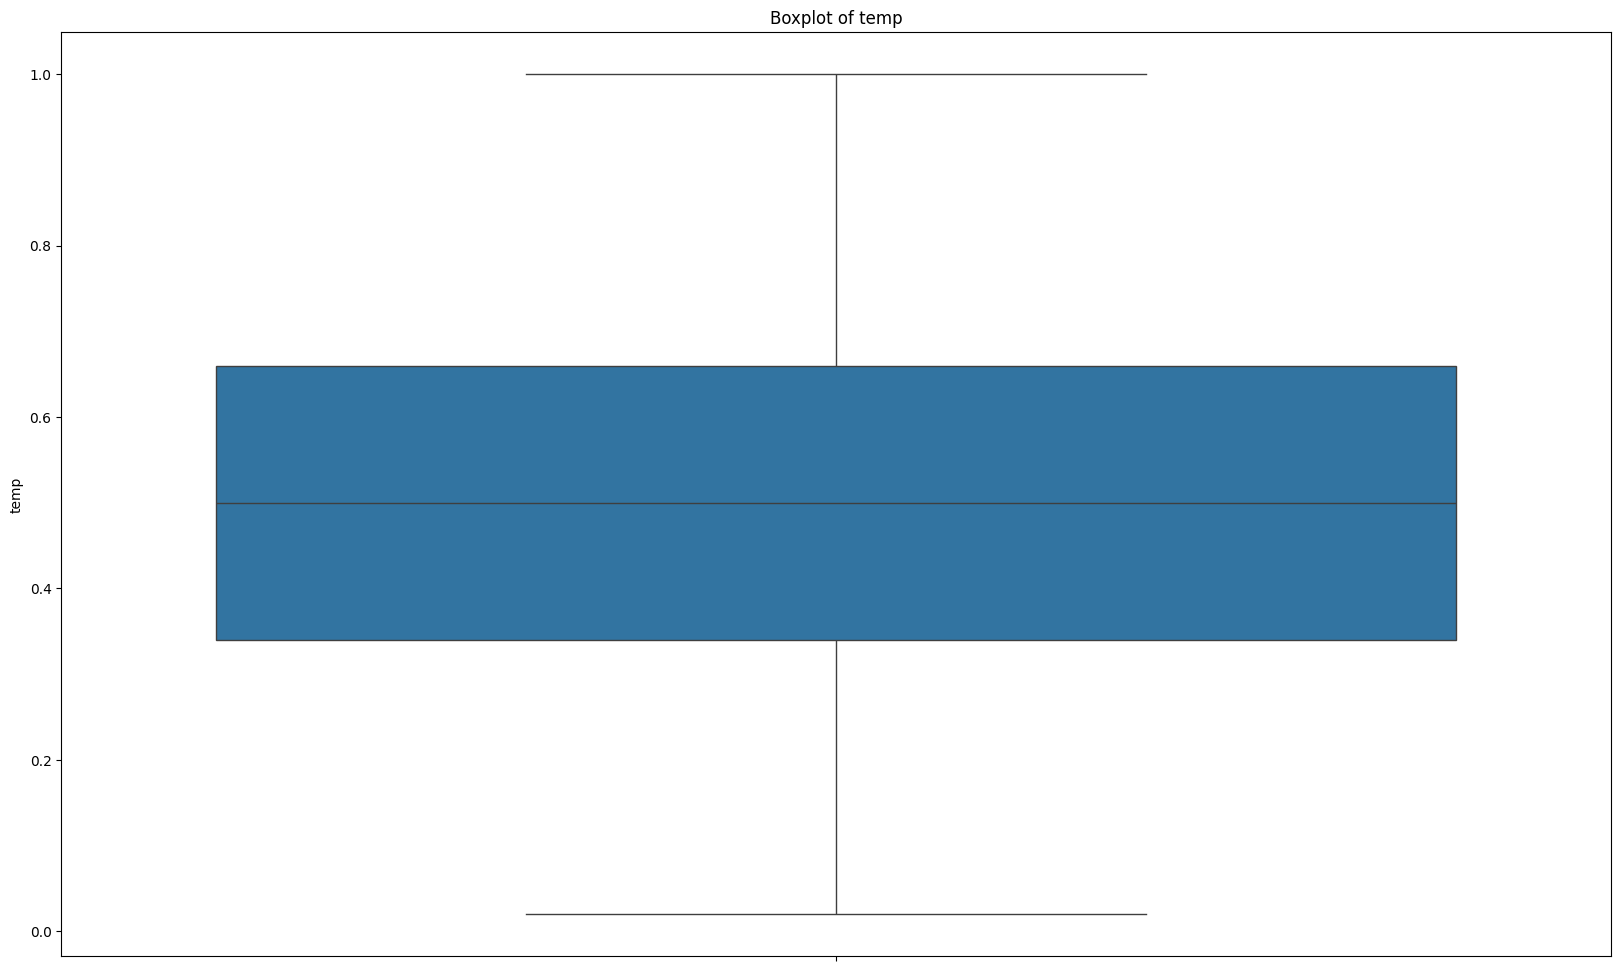

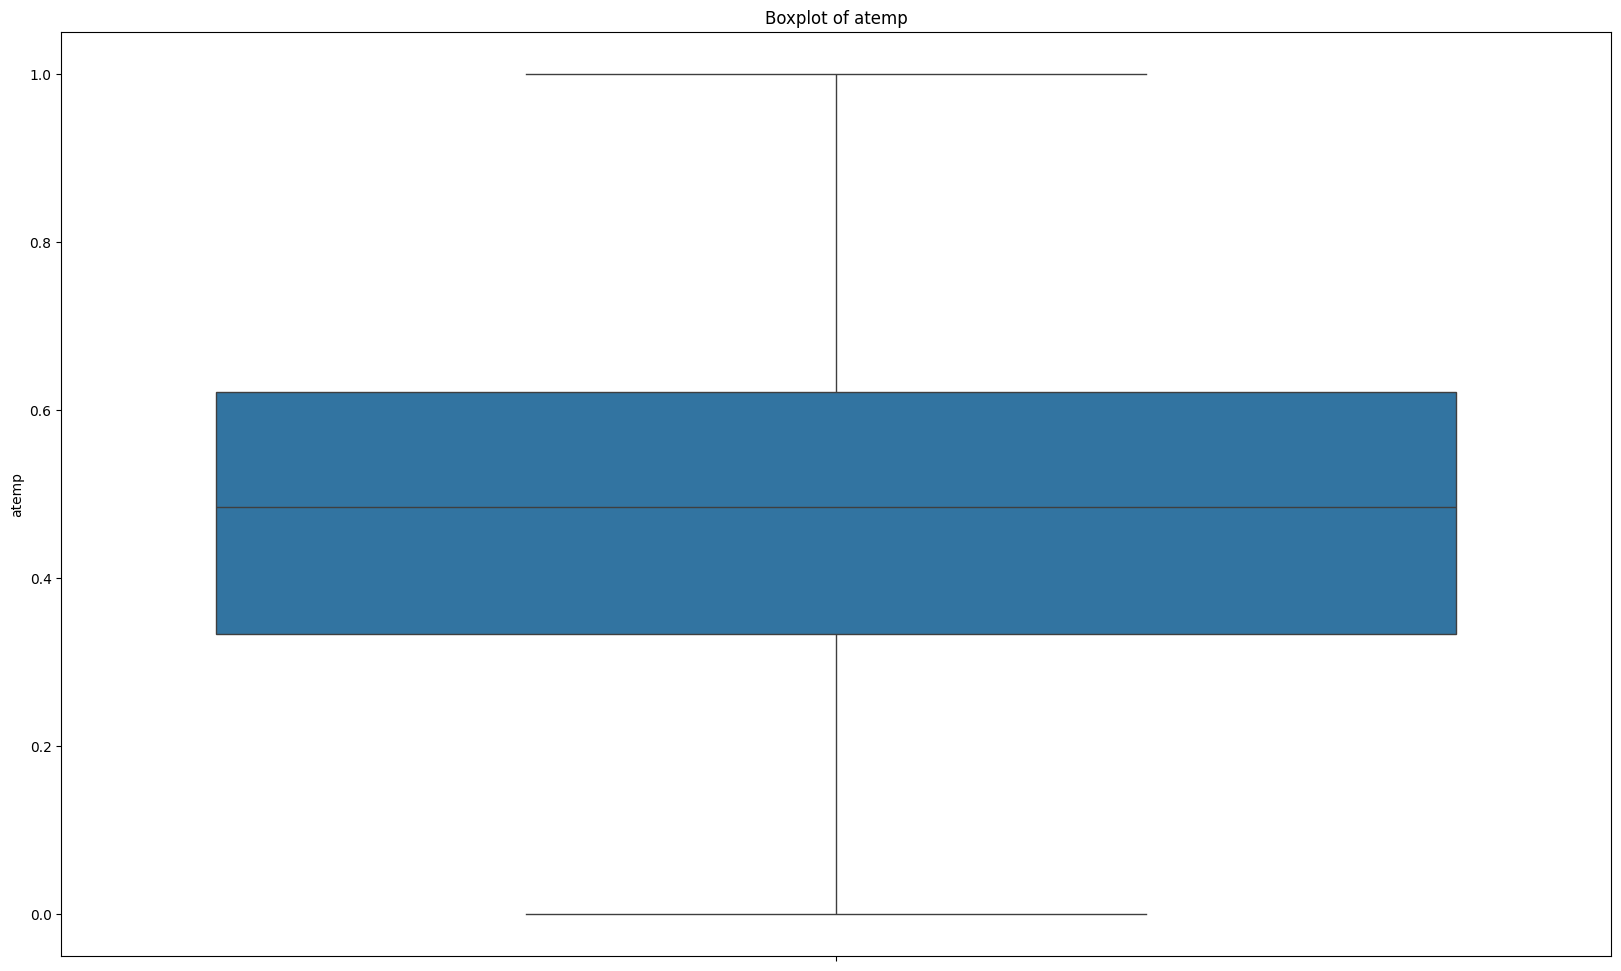

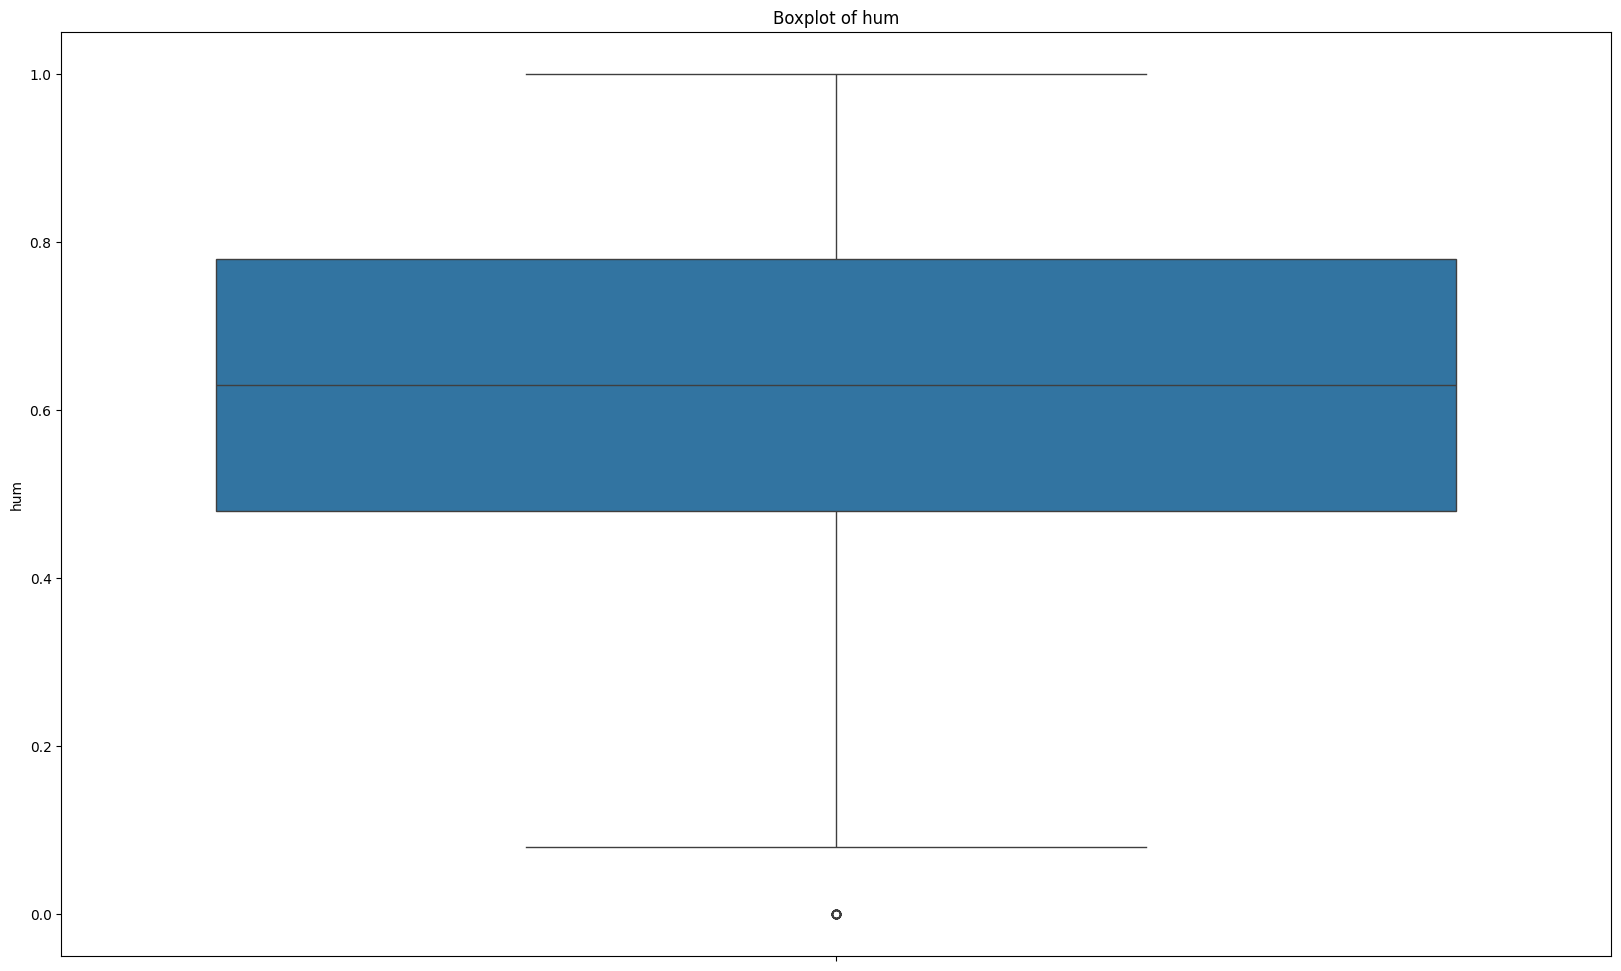

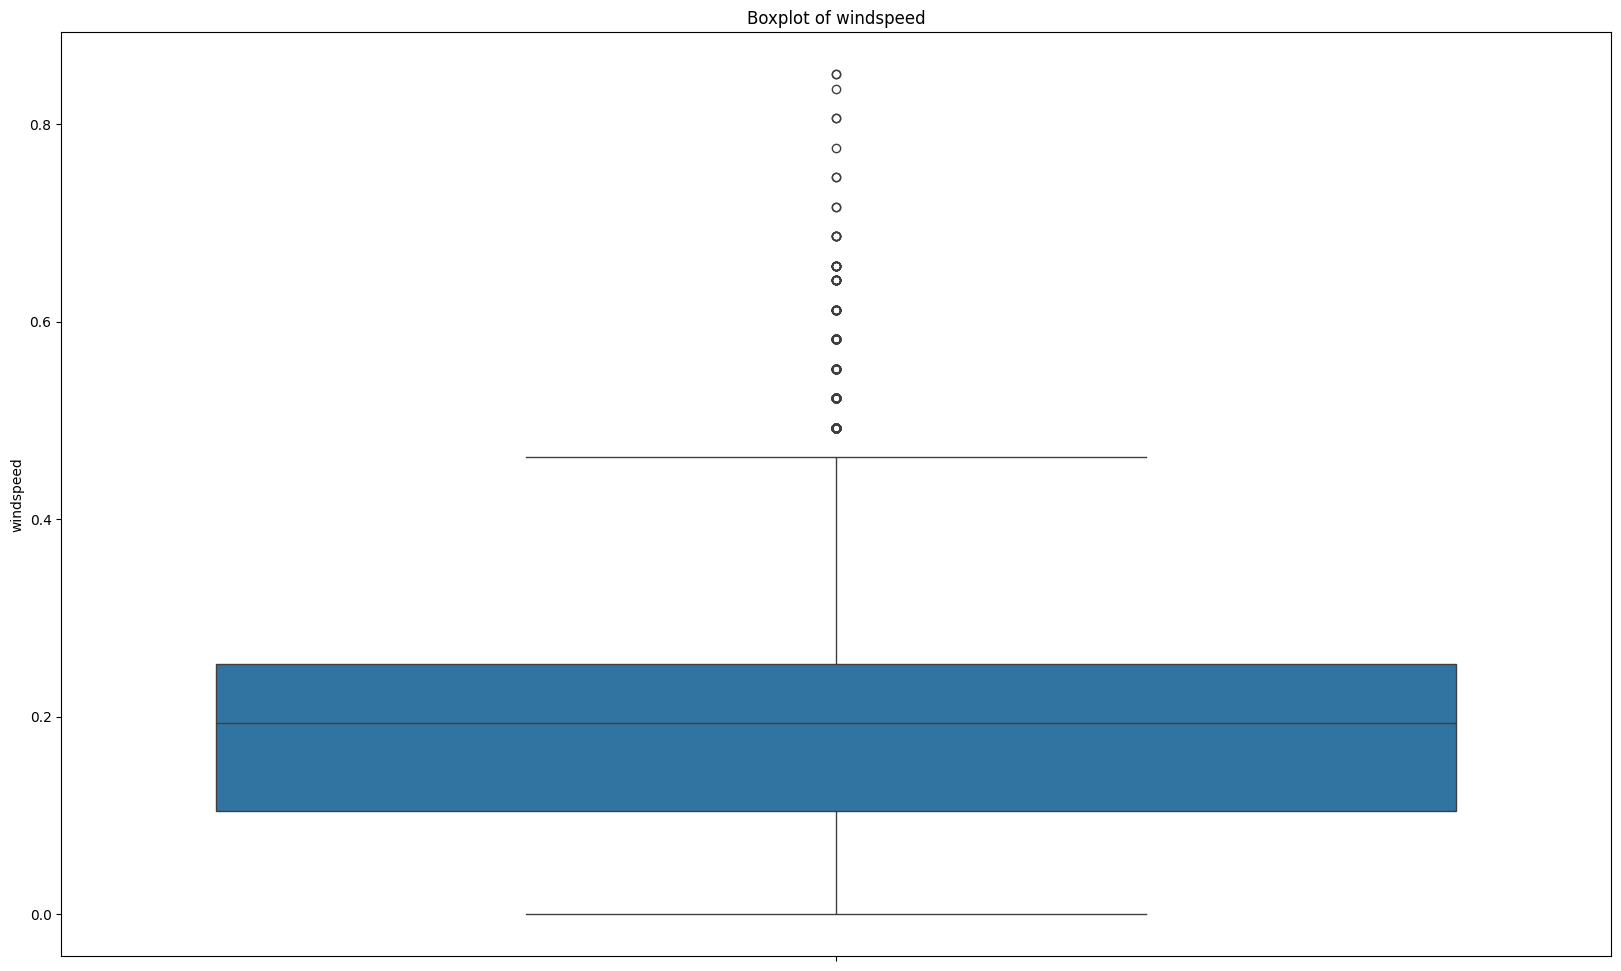

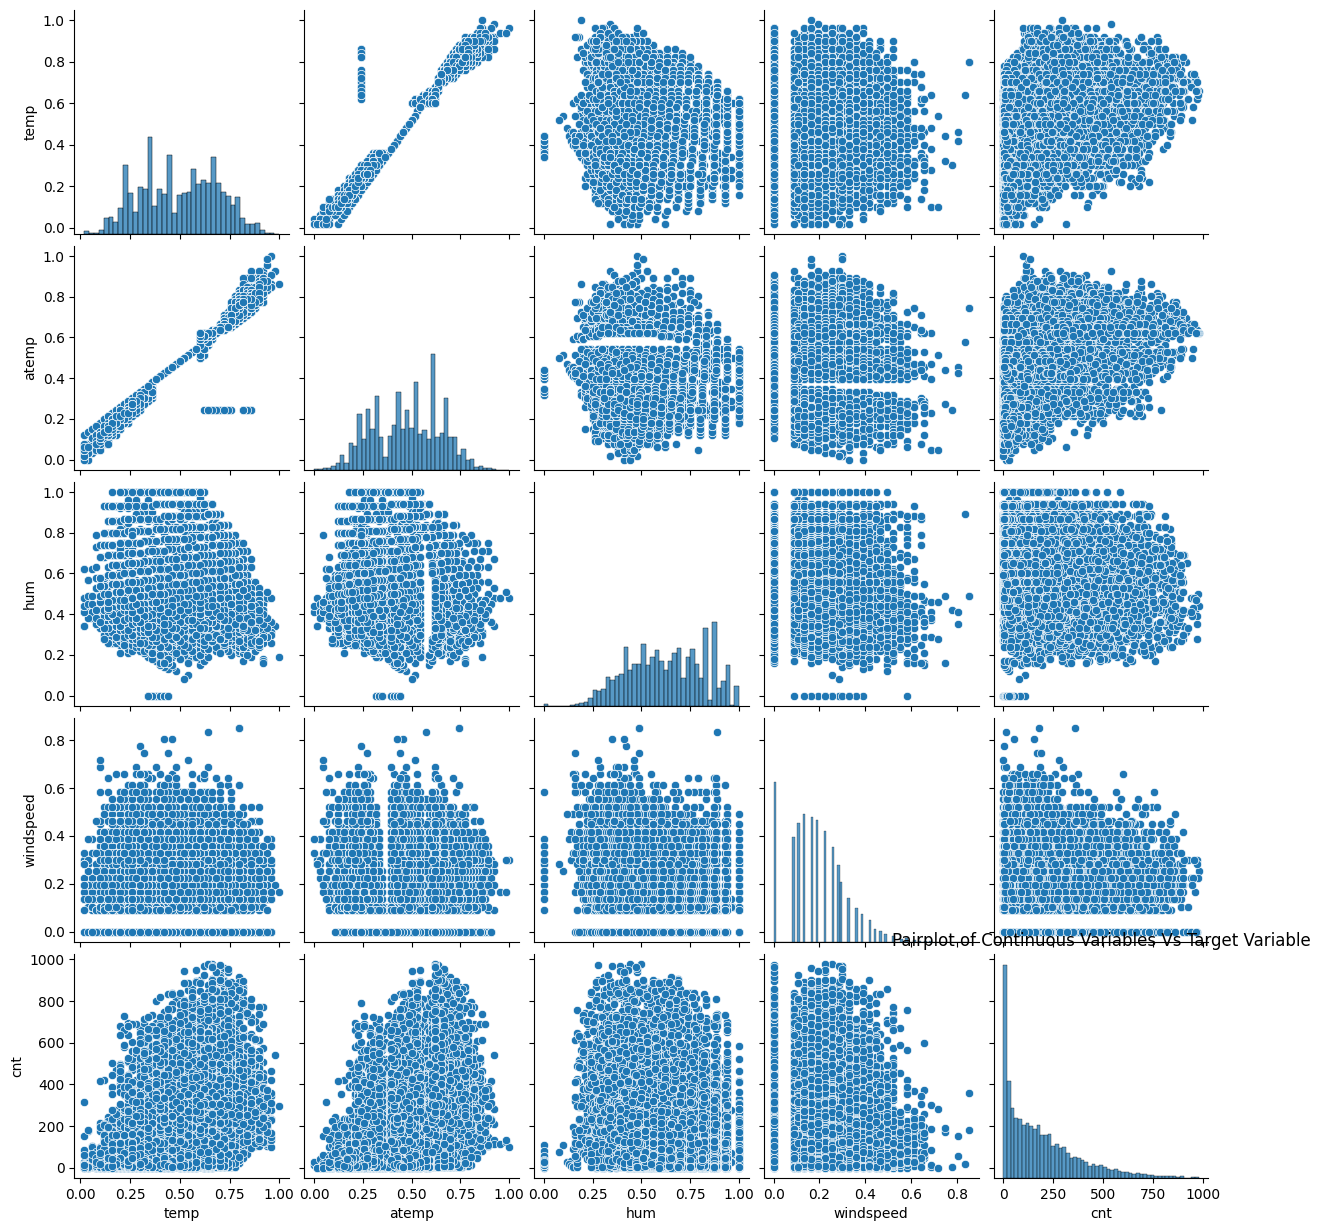

In [3]:
# The default values are all False.
# If you want to check the basic information of the source data, please set IfCheckInfo=True.
# If you want to visualize the data, please set IFVisualAnalysis=True.
# If you want to create the dummy variables, please set IfDummy=True.
# If you want to normalize the continuous variables, please set IfNormalize=True.
# If you have run the code before, you could set the parameters as False to avoid the repeated operations.
# If it comes up with the error: the object is not callable, please restart the kernel and run the code again.
DataPreProcess=DataPreProcess(IFVisualAnalysis=True,IFShowVisualResult=False,IfCheckInfo=True,IfDummy=True,IfNormalize=True)

In [4]:
# If you want to create the dataset, please run the following code.
# If it comes up with the error: "The dummy variable:xxxx.csv does not exist. Please set IfDummy=True.", please set IfDummy=True.And create the object again.
DataPreProcess.CreatDataset()

Rawdata is form: 2012-12-31 to 2011-01-01 totally 731 days.
The validation data is from: 2012-12-31 to 2012-12-11 totally 21 days with 502 records.
The training data is from: 2012-12-10 to 2011-01-01 totally 710 days with 16877 records.
The preprocessed data has been saved in the folder: DataPreProcessed/ProcessedDataset
The preprocessed data has been saved as ValidationData.npy and TrainData.npy.


## b. Model Building
1. You can copy many lines of codes from the lecture material, but I have left
some parts for you to google/figure out on your own. For example, figure out
how to feed the pandas tabular data into Pytorch dataloader yourself. 
2. Try not to copy everything in the lecture notebook, you may have error. 
3. Evaluate your validation results using R-square and MSE. d. Try different parameters/network structure/optimizers etc., and see if you can
obtain good validation results. The number of hidden layers should be equal to
or less than 3

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
import logging

In [52]:
# Set the hyperparameters
# n_epochs=200
# OutputDim=1
# HiddenDim_1=64
# HiddenDim_2=32
# LearningRate=0.001
# batch_size=32
# EarlyStoppingPatience=15
# EarlyStoppingDelta=0.0001
# n_epochs=100
# OutputDim=1
# HiddenDim_1=64
# HiddenDim_2=32
# LearningRate=0.001
# batch_size=32
# EarlyStoppingPatience=10
# EarlyStoppingDelta=0.0001
n_epochs=500
OutputDim=1
HiddenDim_1=64
HiddenDim_2=32
LearningRate=0.001
batch_size=32
EarlyStoppingPatience=30
EarlyStoppingDelta=0.0001

In [53]:
LossList=[]
ValidationLossList=[]

In [54]:
class BikeRidershipDataset(Dataset):
    # Create the dataset based on the preprocessed data,inheriting from the Dataset class in PyTorch
    def __init__(self,DataPath):
        self.scaler = MinMaxScaler()
        # Load the preprocessed data
        self.data=np.load(DataPath,allow_pickle=True)
        # Get the features and the target variable
        self.features=self.data[:,2:]
        self.targets=self.data[:,1]
        # Normalize the target variable
        self.targets=self.scaler.fit_transform(self.targets.reshape(-1,1))
        self.features=np.asarray(self.features,dtype=np.float32)
        self.targets=np.asarray(self.targets,dtype=np.float32)
        # Convert the numpy array to tensor
        self.features=torch.from_numpy(self.features)
        self.targets=torch.from_numpy(self.targets).view(-1,1)
    # Get the length of the dataset
    def __len__(self):
        return len(self.data)
    # Get the features and the target variable
    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

In [55]:
# Set the paths of the preprocessed data
TrainDataPath=os.path.join(DataPreProcess.ProcessedDatasetFolder,'TrainData.npy')
ValidationDataPath=os.path.join(DataPreProcess.ProcessedDatasetFolder,'ValidationData.npy')

In [56]:
# Load the preprocessed data
TrainDataset=BikeRidershipDataset(TrainDataPath)
ValidationDataset=BikeRidershipDataset(ValidationDataPath)

In [57]:
# Create the dataloader
TrainLoader=DataLoader(TrainDataset,batch_size=batch_size,shuffle=True)
ValidationLoader=DataLoader(ValidationDataset,batch_size=batch_size,shuffle=True)

In [58]:
#add the early stopping class to avoid overfitting
class EarlyStopping:
    # Early stopping to stop the training when the loss does not decrease after certain epochs
    def __init__(self, patience=10, delta=0):
        # Set the parameters
        self.patience = patience
        self.delta = delta
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        # Call the class
        if val_loss < (self.best_loss - self.delta):
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [67]:
class BikeSharingDemandModel(nn.Module):
    # Create the model
    def __init__(self, input_dim, hidden_dim_1=64, hidden_dim_2=32,hidden_dim_3=16):
        # Set the structure of the model
        super(BikeSharingDemandModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim_1)
        self.fc2 = nn.Linear(hidden_dim_1, hidden_dim_2)
        self.fc3 = nn.Linear(hidden_dim_2, hidden_dim_3)
        self.fc4 = nn.Linear(hidden_dim_3, 1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        # Forward propagation
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        return x

In [68]:
#train the model
InputDim=TrainDataset.features.shape[1]
model=BikeSharingDemandModel(InputDim,HiddenDim_1,HiddenDim_2)
criterion=nn.MSELoss()
optimizer=optim.Adam(model.parameters(),lr=LearningRate)

In [69]:
#send the model to the device
device=torch.device('cuda')
model.to(device)
criterion.to(device)

MSELoss()

In [70]:
early_stopping = EarlyStopping(patience=EarlyStoppingPatience, delta=EarlyStoppingDelta)

In [71]:
#train the model
for epoch in range(n_epochs):
    model.train()
    running_loss=0.0
    for inputs,labels in TrainLoader:
        inputs,labels=inputs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss+=loss.item()
    print('Epoch: %d, Loss: %.6f' %(epoch+1,running_loss/len(TrainLoader)))
    LossList.append(running_loss/len(TrainLoader))
    early_stopping(running_loss/len(TrainLoader))
    if early_stopping.early_stop:
        print("Early stopping")
        break

Epoch: 1, Loss: 0.010866
Epoch: 2, Loss: 0.007990
Epoch: 3, Loss: 0.007716
Epoch: 4, Loss: 0.007610
Epoch: 5, Loss: 0.007468
Epoch: 6, Loss: 0.007414
Epoch: 7, Loss: 0.007333
Epoch: 8, Loss: 0.007253
Epoch: 9, Loss: 0.007210
Epoch: 10, Loss: 0.007087
Epoch: 11, Loss: 0.007060
Epoch: 12, Loss: 0.007050
Epoch: 13, Loss: 0.006914
Epoch: 14, Loss: 0.006895
Epoch: 15, Loss: 0.006875
Epoch: 16, Loss: 0.006819
Epoch: 17, Loss: 0.006714
Epoch: 18, Loss: 0.006668
Epoch: 19, Loss: 0.006566
Epoch: 20, Loss: 0.006497
Epoch: 21, Loss: 0.006487
Epoch: 22, Loss: 0.006413
Epoch: 23, Loss: 0.006404
Epoch: 24, Loss: 0.006318
Epoch: 25, Loss: 0.006241
Epoch: 26, Loss: 0.006244
Epoch: 27, Loss: 0.006162
Epoch: 28, Loss: 0.006107
Epoch: 29, Loss: 0.006093
Epoch: 30, Loss: 0.006044
Epoch: 31, Loss: 0.005976
Epoch: 32, Loss: 0.005982
Epoch: 33, Loss: 0.005872
Epoch: 34, Loss: 0.005903
Epoch: 35, Loss: 0.005825
Epoch: 36, Loss: 0.005822
Epoch: 37, Loss: 0.005720
Epoch: 38, Loss: 0.005731
Epoch: 39, Loss: 0.00

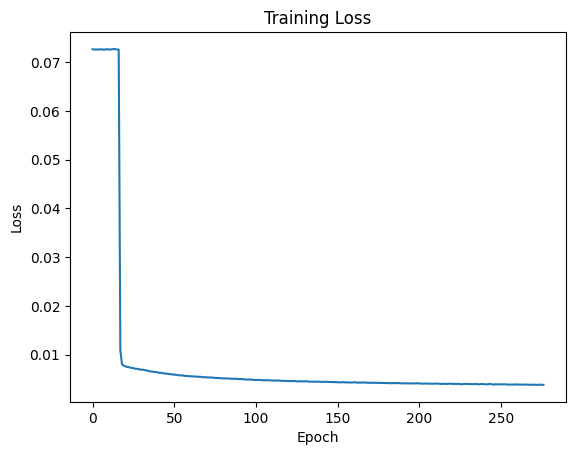

In [72]:
#plot the loss
plt.plot(LossList)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('Training Loss.png')

In [73]:
model.eval()
total_loss = 0
with torch.no_grad():
    for inputs, targets in ValidationLoader:
        inputs, targets = inputs.to(device), targets.to(device)
        predictions = model(inputs)
        predictions = predictions.to(device)
        predictions=predictions.cpu().numpy()
        targets=targets.cpu().numpy()
        predictions=ValidationDataset.scaler.inverse_transform(predictions)
        targets=ValidationDataset.scaler.inverse_transform(targets)
        loss = criterion(torch.from_numpy(predictions), torch.from_numpy(targets))
        ValidationLossList.append(loss.item())
        total_loss += loss.item()
        print(f'Validation MSE: {loss:.4f}')
    avg_loss = total_loss / len(ValidationLoader)
    print(f'Average Validation MSE: {avg_loss:.4f}')

Validation MSE: 3593.0583
Validation MSE: 8671.2520
Validation MSE: 12869.1816
Validation MSE: 5625.1084
Validation MSE: 8093.8311
Validation MSE: 5571.6792
Validation MSE: 5879.0308
Validation MSE: 7847.9512
Validation MSE: 15071.3770
Validation MSE: 9726.6514
Validation MSE: 4466.7876
Validation MSE: 8077.6475
Validation MSE: 7554.5322
Validation MSE: 10667.6875
Validation MSE: 3970.6313
Validation MSE: 11651.4619
Average Validation MSE: 8083.6168


<function matplotlib.pyplot.show(close=None, block=None)>

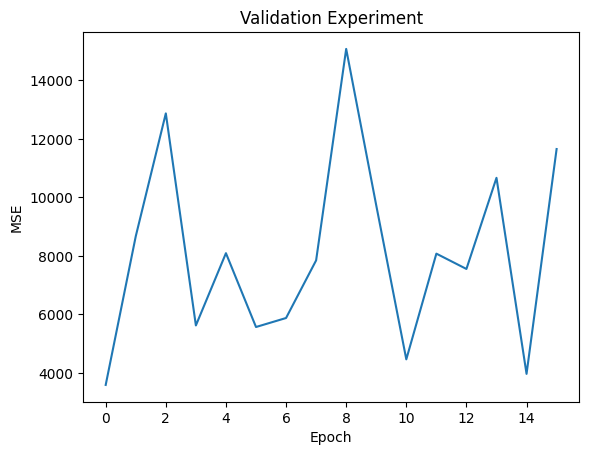

In [74]:
#plot the validation loss
plt.plot(ValidationLossList)
plt.title('Validation Experiment')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show

In [75]:
#plot the real val and the prediction
TestDataset=BikeRidershipDataset(ValidationDataPath)
TestLoader=DataLoader(TestDataset,batch_size=1)
RealPredPal=pd.DataFrame(columns=['Raw_Real','Raw_Prediction','Raw_Error','Scaled_Real','Scaled_Prediction','Scaled_Error'])

In [76]:
index=0
with torch.no_grad():
    for inputs, targets in TestLoader:
        inputs, targets = inputs.to(device), targets.to(device)
        predictions = model(inputs)
        predictions = predictions.to(device)
        predictions=predictions.cpu().numpy()
        targets=targets.cpu().numpy()
        scaled_predictions=TestDataset.scaler.inverse_transform(predictions)
        scaled_targets=TestDataset.scaler.inverse_transform(targets)
        RealPredPal.loc[index]=[targets[0][0],predictions[0][0],abs(targets[0][0]-predictions[0][0]),scaled_targets[0][0],scaled_predictions[0][0],abs(scaled_targets[0][0]-scaled_predictions[0][0])]
        index+=1

In [77]:
RealPredPal

,Raw_Real,Raw_Prediction,Raw_Error,Scaled_Real,Scaled_Prediction,Scaled_Error
0,0.041494,0.031108,0.010386,31.000000,23.490944,7.509056
1,0.009682,0.041383,0.031701,8.000000,30.919708,22.919708
2,0.000000,0.051384,0.051384,1.000000,38.150639,37.150639
3,0.002766,0.000000,0.002766,3.000000,1.000000,2.000000
4,0.009682,0.000000,0.009682,8.000000,1.000000,7.000000
...,...,...,...,...,...,...
497,0.163209,0.301428,0.138219,119.000000,218.932236,99.932236
498,0.121715,0.125630,0.003915,89.000000,91.830765,2.830765
499,0.123098,0.129083,0.005985,90.000000,94.327164,4.327164
500,0.082988,0.088378,0.005391,61.000000,64.897408,3.897408


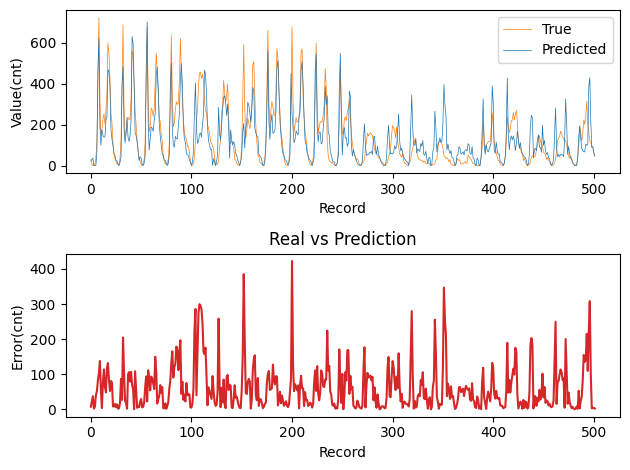

In [78]:
#visualize the real val and the prediction
fig, axs = plt.subplots(2)
y_true=RealPredPal['Scaled_Real']
y_pred=RealPredPal['Scaled_Prediction']
errors=RealPredPal['Scaled_Error']
# Plot actual vs predicted values
axs[0].plot(y_true, 'tab:orange', label='True',linewidth=0.5)
axs[0].plot(y_pred, 'tab:blue', label='Predicted',linewidth=0.5)
axs[0].set_xlabel('Record')
axs[0].set_ylabel('Value(cnt)')
axs[0].legend(loc='best')
# Plot histogram of errors
axs[1].plot(errors, 'tab:red',label='Error')
axs[1].set_xlabel('Record')
axs[1].set_ylabel('Error(cnt)')
plt.title('Real vs Prediction')
plt.tight_layout()
plt.show()
        

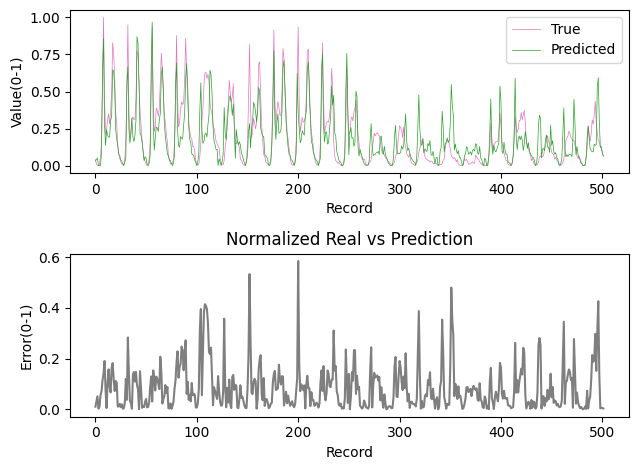

In [79]:
# Visualize the normalized val and the prediction
fig, axs = plt.subplots(2)
y_true=RealPredPal['Raw_Real']
y_pred=RealPredPal['Raw_Prediction']
errors=RealPredPal['Raw_Error']
# Plot actual vs predicted values
axs[0].plot(y_true, 'tab:pink', label='True',linewidth=0.5)
axs[0].plot(y_pred, 'tab:green', label='Predicted',linewidth=0.5)
axs[0].set_xlabel('Record')
axs[0].set_ylabel('Value(0-1)')
axs[0].legend(loc='best')
# Plot histogram of errors
axs[1].plot(errors, 'tab:gray',label='Error')
axs[1].set_xlabel('Record')
axs[1].set_ylabel('Error(0-1)')
plt.title('Normalized Real vs Prediction')
plt.tight_layout()
plt.show()

In [80]:
#calculate the r2 score
def r_squared(y_true, y_pred):
    ssr = torch.sum((y_true - y_pred)**2)
    sst = torch.sum((y_true - torch.mean(y_true))**2)
    r2_score = 1 - ssr/sst
    return r2_score

In [81]:
#calculate the mse
def calculate_mse(y_true, y_pred):
    mse = F.mse_loss(y_true, y_pred)
    return mse

In [82]:
#get the r2 score and the mse
r2_score = r_squared(torch.from_numpy(RealPredPal['Scaled_Real'].values), torch.from_numpy(RealPredPal['Scaled_Prediction'].values))
mse = calculate_mse(torch.from_numpy(RealPredPal['Scaled_Real'].values), torch.from_numpy(RealPredPal['Scaled_Prediction'].values))
print(f'The R2 Score of this model on our validation dataset is: {r2_score:.4f}')
print(f'The Mean Squared Error of this model on our validation dataset is: {mse:.4f}')

The R2 Score of this model on our validation dataset is: 0.6339
The Mean Squared Error of this model on our validation dataset is: 8012.5444


Through many experiments and adjusting the hyperparameters (including batch_size, number of neurons, number of iterations, and early stop condition), I was not able to find a satisfactory model, but due to the limitation of the number of layers of the model structure, the composite network structure (e.g., CNN+LSTM, CNN+Transformer, etc.) was not well suited for the current task. 

I subsequently tried to build the model using a pure Transformer (without positional coding) hybrid linear layer, but the results were not very good either, and I speculate that the reason for this is not only that the network structure is too simple, but also that the original data is too sparse due to the retention of too many dummy variables in the preprocessing stage.

by wenhe xu 